# Importing libraries and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from Utils import Utils

from sklearn.ensemble import RandomForestRegressor as SKLearnRandomForestRegressor
from sklearn.tree import DecisionTreeRegressor as SKLearnDecisionTreeRegressor
from sklearn.linear_model import LinearRegression as SKLearnLinearRegression

from DecisionTreeRegressor import DecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor
from LinearRegression import LinearRegression

# Reading and splitting the data

In [2]:
df = pd.read_csv('./NSO_Population_Sex_dataset/NSO_POPULATION_DATA_CLEANED.csv')

feature_cols = ['District', 'Sex', 'Year', 'Population_Growth_Rate','Average_Population']
X = pd.get_dummies(df[feature_cols], columns=['District', 'Sex'])
y = df["Population"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Custom Implementations - Decision Tree, Random Forest, Linear Regression

In [8]:
MBD_Denominator = np.where(np.abs(y_test) > 1e-10, y_test, 1e-10) # Small constant to avoid division by very small values

# Decision Tree Regressor 
Custom_Decision_Tree_Regressor = DecisionTreeRegressor(max_depth=100, min_samples_split=2, min_samples_leaf=1)
Custom_Decision_Tree_Regressor.fit(X_train.values, y_train.values)
Custom_Decision_Tree_Regressor_Prediction = Custom_Decision_Tree_Regressor.predict(X_test.values)
Custom_Decision_Tree_Regressor_Prediction_MAE = mean_absolute_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Mean Absolute Error
Custom_Decision_Tree_Regressor_MedianAE = median_absolute_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Median Absolute Error
Custom_Decision_Tree_Regressor_Prediction_MSE = mean_squared_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Mean Squared Error
Custom_Decision_Tree_Regressor_Prediction_RMSE = Utils.root_mean_squared_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Root Mean Squared Error
Custom_Decision_Tree_Regressor_Prediction_R2 = r2_score(y_test, Custom_Decision_Tree_Regressor_Prediction)  # R-squared
Custom_Decision_Tree_Regressor_Explained_Variance = explained_variance_score(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Explained Variance Score
Custom_Decision_Tree_Regressor_MBD = np.mean((y_test - Custom_Decision_Tree_Regressor_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
Custom_Decision_Tree_Regressor_MaxError = max_error(y_test, Custom_Decision_Tree_Regressor_Prediction)  # Maximum Error
Custom_Decision_Tree_Regressor_HuberLoss = mean_squared_error(y_test, Custom_Decision_Tree_Regressor_Prediction, squared=False)  # Huber Loss
Custom_Decision_Tree_Regressor_QuantileLoss = Utils.quantile_loss(y_test, Custom_Decision_Tree_Regressor_Prediction, alpha=0.5)  # Quantile Loss
Custom_Decision_Tree_Regressor_MAPE = np.mean(np.abs((y_test - Custom_Decision_Tree_Regressor_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
Custom_Decision_Tree_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - Custom_Decision_Tree_Regressor_Prediction) / (np.abs(y_test) + np.abs(Custom_Decision_Tree_Regressor_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error

# Random Forest Regressor
Custom_Random_Forest_Regressor = RandomForestRegressor(n_estimators=100, max_depth=100, min_samples_split=1, min_samples_leaf=1)
Custom_Random_Forest_Regressor.fit(X_train.values, y_train.values)
Custom_Random_Forest_Regressor_Prediction = Custom_Random_Forest_Regressor.predict(X_test)
Custom_Random_Forest_Regressor_MAE = mean_absolute_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Mean Absolute Error
Custom_Random_Forest_Regressor_MedianAE = median_absolute_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Median Absolute Error
Custom_Random_Forest_Regressor_MSE = mean_squared_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Mean Squared Error
Custom_Random_Forest_Regressor_RMSE = Utils.root_mean_squared_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Root Mean Squared Error
Custom_Random_Forest_Regressor_R2 = r2_score(y_test, Custom_Random_Forest_Regressor_Prediction)  # R-squared
Custom_Random_Forest_Regressor_Explained_Variance = explained_variance_score(y_test, Custom_Random_Forest_Regressor_Prediction)  # Explained Variance Score
Custom_Random_Forest_Regressor_MBD = np.mean((y_test - Custom_Random_Forest_Regressor_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
Custom_Random_Forest_Regressor_MaxError = max_error(y_test, Custom_Random_Forest_Regressor_Prediction)  # Maximum Error
Custom_Random_Forest_Regressor_HuberLoss = mean_squared_error(y_test, Custom_Random_Forest_Regressor_Prediction, squared=False)  # Huber Loss
Custom_Random_Forest_Regressor_QuantileLoss = Utils.quantile_loss(y_test, Custom_Random_Forest_Regressor_Prediction, alpha=0.5)  # Quantile Loss
Custom_Random_Forest_Regressor_MAPE = np.mean(np.abs((y_test - Custom_Random_Forest_Regressor_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
Custom_Random_Forest_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - Custom_Random_Forest_Regressor_Prediction) / (np.abs(y_test) + np.abs(Custom_Random_Forest_Regressor_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error

# Linear Regression
Custom_Linear_Regression = LinearRegression(learning_rate=0.01, num_iterations=1000)
Custom_Linear_Regression.fit(X_train.values, y_train.values)
Custom_Linear_Regression_Prediction = Custom_Linear_Regression.predict(X_test)
Custom_Linear_Regression_MAE = mean_absolute_error(y_test, Custom_Linear_Regression_Prediction)  # Mean Absolute Error
Custom_Linear_Regression_MedianAE = median_absolute_error(y_test, Custom_Linear_Regression_Prediction)  # Median Absolute Error
Custom_Linear_Regression_MSE = mean_squared_error(y_test, Custom_Linear_Regression_Prediction)  # Mean Squared Error
Custom_Linear_Regression_RMSE = Utils.root_mean_squared_error(y_test, Custom_Linear_Regression_Prediction)  # Root Mean Squared Error
Custom_Linear_Regression_R2 = r2_score(y_test, Custom_Linear_Regression_Prediction)  # R-squared
Custom_Linear_Regression_Explained_Variance = explained_variance_score(y_test, Custom_Linear_Regression_Prediction)  # Explained Variance Score
Custom_Linear_Regression_MBD = np.mean((y_test - Custom_Linear_Regression_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
Custom_Linear_Regression_MaxError = max_error(y_test, Custom_Linear_Regression_Prediction)  # Maximum Error
Custom_Linear_Regression_HuberLoss = mean_squared_error(y_test, Custom_Linear_Regression_Prediction, squared=False)  # Huber Loss
Custom_Linear_Regression_QuantileLoss = Utils.quantile_loss(y_test, Custom_Linear_Regression_Prediction, alpha=0.5)  # Quantile Loss
Custom_Linear_Regression_MAPE = np.mean(np.abs((y_test - Custom_Linear_Regression_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
Custom_Linear_Regression_SMAPE = 2 * np.mean(np.abs(y_test - Custom_Linear_Regression_Prediction) / (np.abs(y_test) + np.abs(Custom_Linear_Regression_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error

# SKLearn Implementations - Decision Tree, Custom Random Forest using SKLearn Decision Trees, Random Forest, Linear Regression

In [10]:
# SKLearn Decision Tree Regressor
SKLearn_Decision_Tree_Regressor = SKLearnDecisionTreeRegressor(max_depth=100, min_samples_split=2, min_samples_leaf=5)
SKLearn_Decision_Tree_Regressor.fit(X_train, y_train)
SKLearn_Decision_Tree_Regressor_Prediction = SKLearn_Decision_Tree_Regressor.predict(X_test)
SKLearn_Decision_Tree_Regressor_Prediction_MAE = mean_absolute_error(y_test, SKLearn_Decision_Tree_Regressor_Prediction) # Mean Absolute Error
SKLearn_Decision_Tree_Regressor_MedianAE = median_absolute_error(y_test, SKLearn_Decision_Tree_Regressor_Prediction)  # Median Absolute Error
SKLearn_Decision_Tree_Regressor_Prediction_MSE = mean_squared_error(y_test, SKLearn_Decision_Tree_Regressor_Prediction)  # Mean Squared Error
SKLearn_Decision_Tree_Regressor_Prediction_RMSE = Utils.root_mean_squared_error(y_test, SKLearn_Decision_Tree_Regressor_Prediction)  # Root Mean Squared Error
SKLearn_Decision_Tree_Regressor_Prediction_R2 = r2_score(y_test, SKLearn_Decision_Tree_Regressor_Prediction)  # R-squared
SKLearn_Decision_Tree_Regressor_Explained_Variance= explained_variance_score(y_test, SKLearn_Decision_Tree_Regressor_Prediction)  # Explained Variance Score
SKLearn_Decision_Tree_Regressor_MBD = np.mean((y_test - SKLearn_Decision_Tree_Regressor_Prediction) / MBD_Denominator) * 100  # Mean Bias Deviation
SKLearn_Decision_Tree_Regressor_MaxError = max_error(y_test, SKLearn_Decision_Tree_Regressor_Prediction)  # Maximum Error
SKLearn_Decision_Tree_Regressor_HuberLoss = mean_squared_error(y_test, SKLearn_Decision_Tree_Regressor_Prediction, squared=False)  # Huber Loss
SKLearn_Decision_Tree_Regressor_QuantileLoss = Utils.quantile_loss(y_test, SKLearn_Decision_Tree_Regressor_Prediction, alpha=0.5)  # Quantile Loss
SKLearn_Decision_Tree_Regressor_MAPE = np.mean(np.abs((y_test - SKLearn_Decision_Tree_Regressor_Prediction) / y_test)) * 100  # Mean Absolute Percentage Error
SKLearn_Decision_Tree_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - SKLearn_Decision_Tree_Regressor_Prediction) / (np.abs(y_test) + np.abs(SKLearn_Decision_Tree_Regressor_Prediction))) * 100  # Symmetric Mean Absolute Percentage Error


# Custom Random Forest Regressor using SKLearn Decision Trees
SKLearn_Decision_Trees_Random_Forest_Regressor = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, custom=False)
SKLearn_Decision_Trees_Random_Forest_Regressor.fit(X_train, y_train)
SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction = SKLearn_Decision_Trees_Random_Forest_Regressor.predict(X_test)
SKLearn_Decision_Trees_Random_Forest_Regressor_MAE = mean_absolute_error(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # Mean Absolute Error
SKLearn_Decision_Trees_Random_Forest_Regressor_MedianAE = median_absolute_error(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # Median Absolute Error
SKLearn_Decision_Trees_Random_Forest_Regressor_MSE = mean_squared_error(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # Mean Squared Error
SKLearn_Decision_Trees_Random_Forest_Regressor_RMSE = Utils.root_mean_squared_error(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # Root Mean Squared Error
SKLearn_Decision_Trees_Random_Forest_Regressor_R2 = r2_score(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # R-squared
SKLearn_Decision_Trees_Random_Forest_Regressor_Explained_Variance = explained_variance_score(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # Explained Variance Score
SKLearn_Decision_Trees_Random_Forest_Regressor_MBD = np.mean((y_test - SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) / MBD_Denominator) * 100 # Mean Bias Deviation
SKLearn_Decision_Trees_Random_Forest_Regressor_MaxError = max_error(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) # Maximum Error
SKLearn_Decision_Trees_Random_Forest_Regressor_HuberLoss = mean_squared_error(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction, squared=False) # Huber Loss
SKLearn_Decision_Trees_Random_Forest_Regressor_QuantileLoss = Utils.quantile_loss(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction, alpha=0.5) # Quantile Loss
SKLearn_Decision_Trees_Random_Forest_Regressor_MAPE = np.mean(np.abs((y_test - SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) / y_test)) * 100 # Mean Absolute Percentage Error
SKLearn_Decision_Trees_Random_Forest_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction) / (np.abs(y_test) + np.abs(SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction))) * 100 # Symmetric Mean Absolute Percentage Error

# SKLearn Random Forest Regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
SKLearn_Random_Forest_Regressor = SKLearnRandomForestRegressor()
SKLearn_Random_Forest_Regressor.fit(X_train, y_train)
SKLearn_Random_Forest_Regressor_Prediction = SKLearn_Random_Forest_Regressor.predict(X_test)
SKLearn_Random_Forest_Regressor_Prediction_MAE = mean_absolute_error(y_test, SKLearn_Random_Forest_Regressor_Prediction) # Mean Absolute Error
SKLearn_Random_Forest_Regressor_Prediction_MedianAE = median_absolute_error(y_test, SKLearn_Random_Forest_Regressor_Prediction) # Median Absolute Error
SKLearn_Random_Forest_Regressor_Prediction_MSE = mean_squared_error(y_test, SKLearn_Random_Forest_Regressor_Prediction) # Mean Squared Error
SKLearn_Random_Forest_Regressor_Prediction_RMSE = Utils.root_mean_squared_error(y_test, SKLearn_Random_Forest_Regressor_Prediction) # Root Mean Squared Error
SKLearn_Random_Forest_Regressor_Prediction_R2 = r2_score(y_test, SKLearn_Random_Forest_Regressor_Prediction) # R-squared
SKLearn_Random_Forest_Regressor_Explained_Variance = explained_variance_score(y_test, SKLearn_Random_Forest_Regressor_Prediction) # Explained Variance Score
SKLearn_Random_Forest_Regressor_MBD = np.mean((y_test - SKLearn_Random_Forest_Regressor_Prediction) / MBD_Denominator) * 100 # Mean Bias Deviation
SKLearn_Random_Forest_Regressor_MaxError = max_error(y_test, SKLearn_Random_Forest_Regressor_Prediction) # Maximum Error
SKLearn_Random_Forest_Regressor_HuberLoss = mean_squared_error(y_test, SKLearn_Random_Forest_Regressor_Prediction, squared=False) # Huber Loss
SKLearn_Random_Forest_Regressor_QuantileLoss = Utils.quantile_loss(y_test, SKLearn_Random_Forest_Regressor_Prediction, alpha=0.5) # Quantile Loss
SKLearn_Random_Forest_Regressor_MAPE = np.mean(np.abs((y_test - SKLearn_Random_Forest_Regressor_Prediction) / y_test)) * 100 # Mean Absolute Percentage Error
SKLearn_Random_Forest_Regressor_SMAPE = 2 * np.mean(np.abs(y_test - SKLearn_Random_Forest_Regressor_Prediction) / (np.abs(y_test) + np.abs(SKLearn_Random_Forest_Regressor_Prediction))) * 100 # Symmetric Mean Absolute Percentage Error

# SKLearn Linear Regression 
SKLearn_Linear_Regression = SKLearnLinearRegression()
SKLearn_Linear_Regression.fit(X_train, y_train)
SKLearn_Linear_Regression_Prediction = SKLearn_Linear_Regression.predict(X_test)
SKLearn_Linear_Regression_MAE = mean_absolute_error(y_test, SKLearn_Linear_Regression_Prediction) # Mean Absolute Error
SKLearn_Linear_Regression_MedianAE = median_absolute_error(y_test, SKLearn_Linear_Regression_Prediction) # Median Absolute Error
SKLearn_Linear_Regression_MSE = mean_squared_error(y_test, SKLearn_Linear_Regression_Prediction) # Mean Squared Error
SKLearn_Linear_Regression_RMSE = Utils.root_mean_squared_error(y_test, SKLearn_Linear_Regression_Prediction) # Root Mean Squared Error
SKLearn_Linear_Regression_R2 = r2_score(y_test, SKLearn_Linear_Regression_Prediction) # R-squared
SKLearn_Linear_Regression_Explained_Variance = explained_variance_score(y_test, SKLearn_Linear_Regression_Prediction) # Explained Variance Score
SKLearn_Linear_Regression_MBD = np.mean((y_test - SKLearn_Linear_Regression_Prediction) / MBD_Denominator) * 100 # Mean Bias Deviation
SKLearn_Linear_Regression_MaxError = max_error(y_test, SKLearn_Linear_Regression_Prediction) # Maximum Error
SKLearn_Linear_Regression_HuberLoss = mean_squared_error(y_test, SKLearn_Linear_Regression_Prediction, squared=False) # Huber Loss
SKLearn_Linear_Regression_QuantileLoss = Utils.quantile_loss(y_test, SKLearn_Linear_Regression_Prediction, alpha=0.5) # Quantile Loss
SKLearn_Linear_Regression_MAPE = np.mean(np.abs((y_test - SKLearn_Linear_Regression_Prediction) / y_test)) * 100 # Mean Absolute Percentage Error
SKLearn_Linear_Regression_SMAPE = 2 * np.mean(np.abs(y_test - SKLearn_Linear_Regression_Prediction) / (np.abs(y_test) + np.abs(SKLearn_Linear_Regression_Prediction))) * 100 # Symmetric Mean Absolute Percentage Error

# Scatter Plots - Actual vs Predicted values

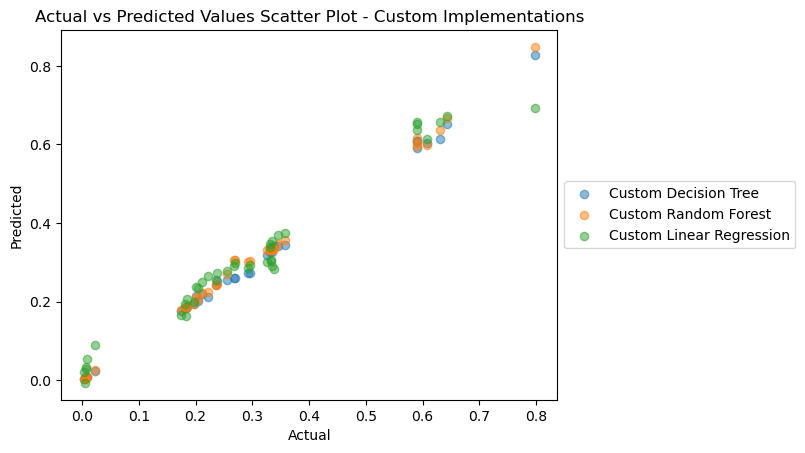

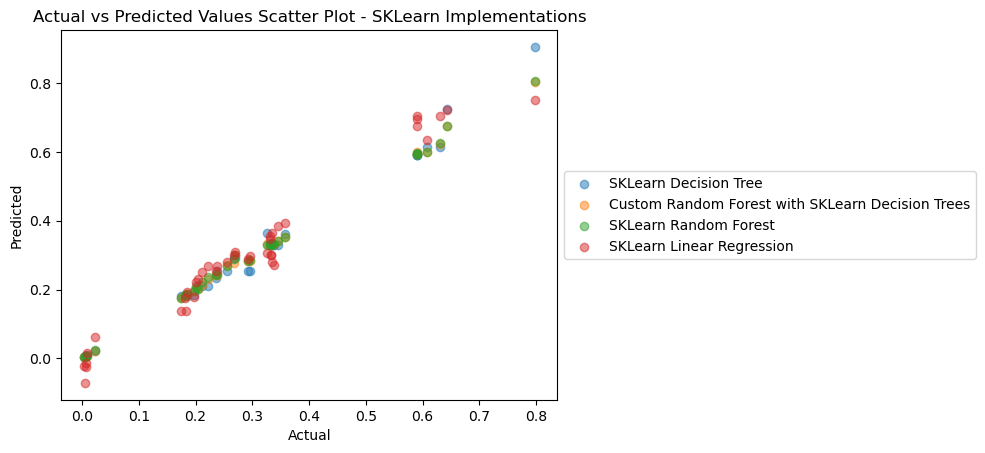

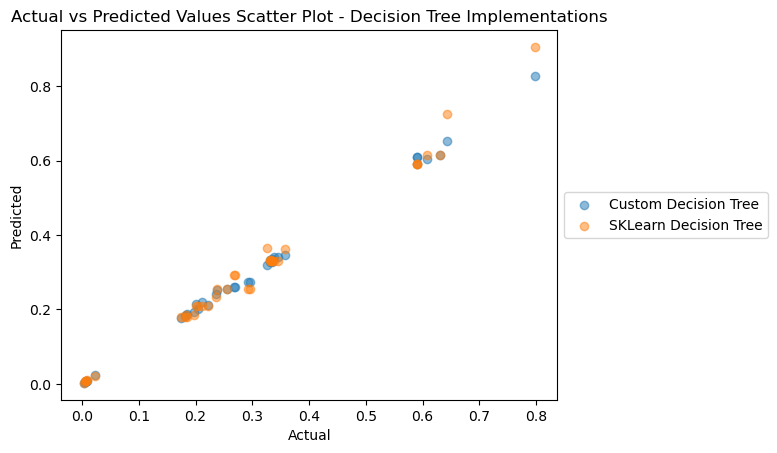

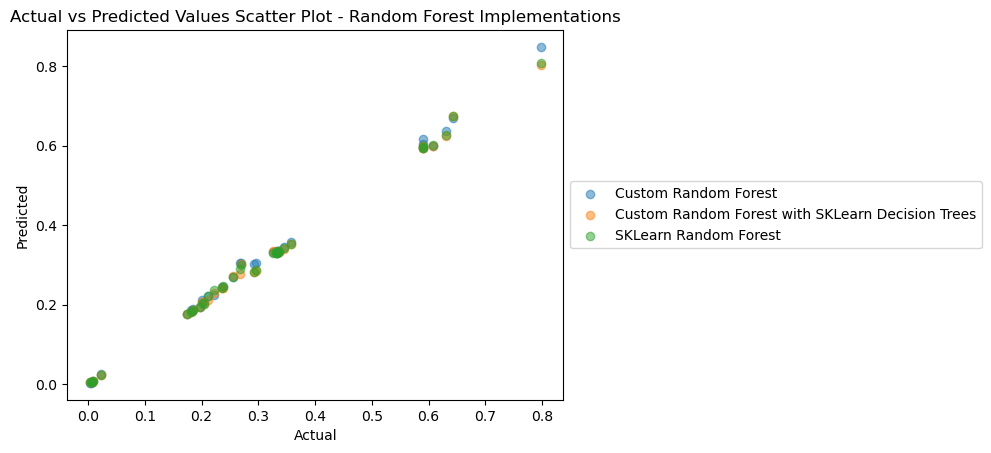

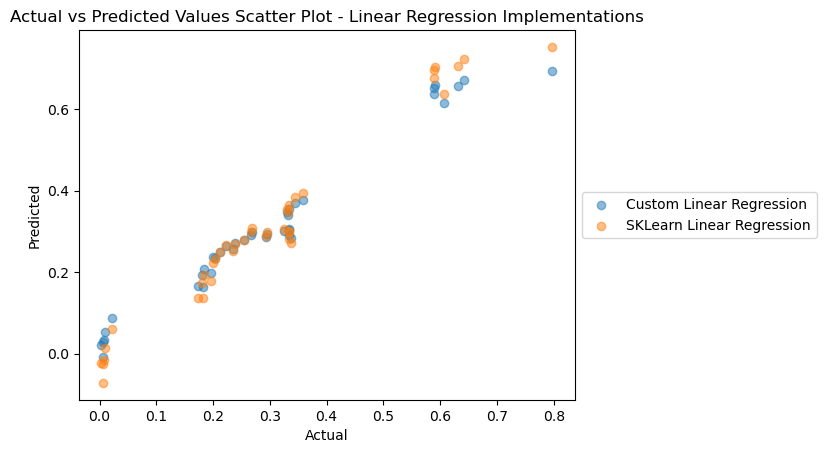

In [11]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
plt.scatter(y_test, Custom_Decision_Tree_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, Custom_Random_Forest_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, Custom_Linear_Regression_Prediction, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values Scatter Plot - Custom Implementations')
plt.legend(['Custom Decision Tree', 'Custom Random Forest', 'Custom Linear Regression'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# SKLearn Decision Tree vs SKLearn Random Forest vs SKLearn Linear Regression
plt.scatter(y_test, SKLearn_Decision_Tree_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Random_Forest_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Linear_Regression_Prediction, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values Scatter Plot - SKLearn Implementations')
plt.legend(['SKLearn Decision Tree', 'Custom Random Forest with SKLearn Decision Trees', 'SKLearn Random Forest', 'SKLearn Linear Regression'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Custom vs SKLearn Decision Tree
plt.scatter(y_test, Custom_Decision_Tree_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Decision_Tree_Regressor_Prediction, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values Scatter Plot - Decision Tree Implementations')
plt.legend(['Custom Decision Tree', 'SKLearn Decision Tree'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Custom vs SKLearn Random Forest
plt.scatter(y_test, Custom_Random_Forest_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Random_Forest_Regressor_Prediction, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values Scatter Plot - Random Forest Implementations')
plt.legend(['Custom Random Forest', 'Custom Random Forest with SKLearn Decision Trees', 'SKLearn Random Forest'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Custom vs SKLearn Linear Regression
plt.scatter(y_test, Custom_Linear_Regression_Prediction, alpha=0.5)
plt.scatter(y_test, SKLearn_Linear_Regression_Prediction, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values Scatter Plot - Linear Regression Implementations')
plt.legend(['Custom Linear Regression', 'SKLearn Linear Regression'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Line Plots - Actual vs Predicted values

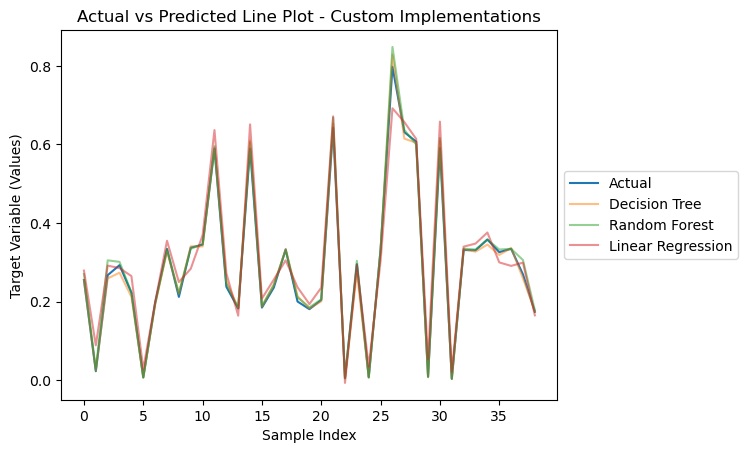

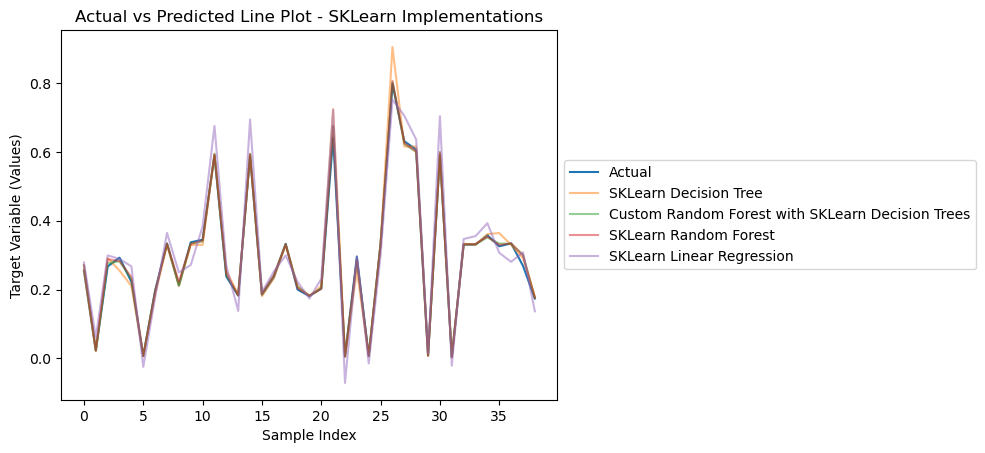

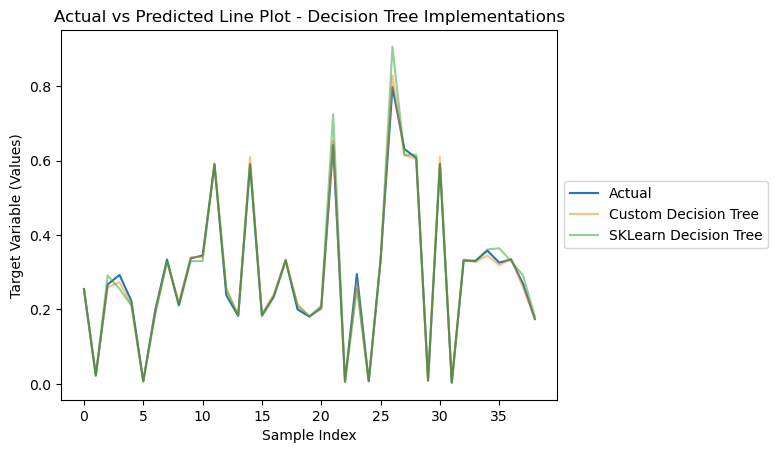

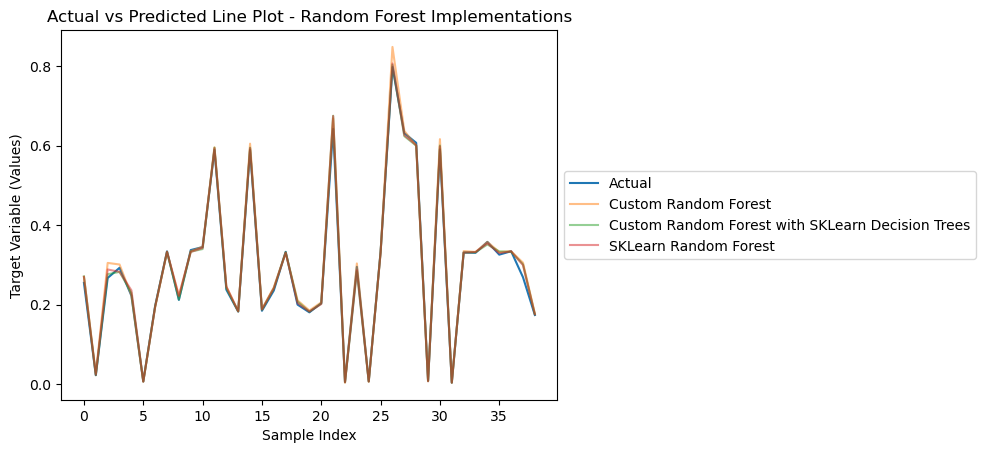

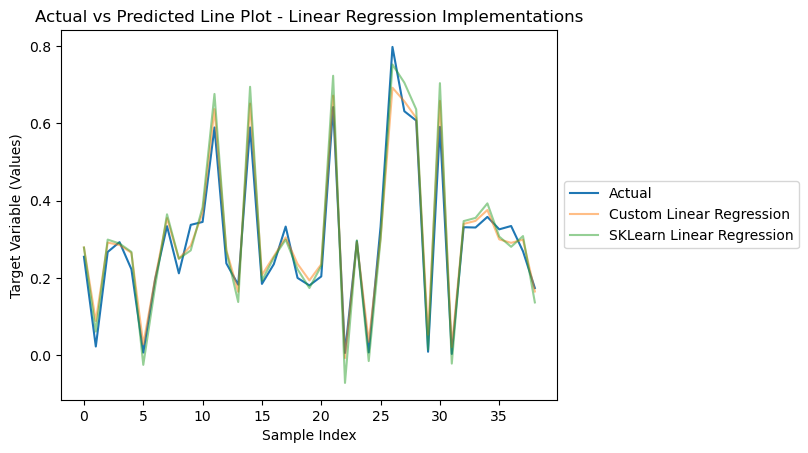

In [12]:
# Custom Decision Tree vs Custom Random Forest vs Custom Linear Regression
plt.plot(y_test.values, label='Actual')
plt.plot(Custom_Decision_Tree_Regressor_Prediction, label='Decision Tree', alpha=0.5)
plt.plot(Custom_Random_Forest_Regressor_Prediction, label='Random Forest', alpha=0.5)
plt.plot(Custom_Linear_Regression_Prediction, label='Linear Regression', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Predicted Line Plot - Custom Implementations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# SKLearn Decision Tree vs SKLearn Random Forest vs SKLearn Linear Regression
plt.plot(y_test.values, label='Actual')
plt.plot(SKLearn_Decision_Tree_Regressor_Prediction, label='SKLearn Decision Tree', alpha=0.5)
plt.plot(SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction, label='Custom Random Forest with SKLearn Decision Trees', alpha=0.5)
plt.plot(SKLearn_Random_Forest_Regressor_Prediction, label='SKLearn Random Forest', alpha=0.5)
plt.plot(SKLearn_Linear_Regression_Prediction, label='SKLearn Linear Regression', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Predicted Line Plot - SKLearn Implementations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Custom vs SKLearn Decision Tree
plt.plot(y_test.values, label='Actual')
plt.plot(Custom_Decision_Tree_Regressor_Prediction, label='Custom Decision Tree', alpha=0.5)
plt.plot(SKLearn_Decision_Tree_Regressor_Prediction, label='SKLearn Decision Tree', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Predicted Line Plot - Decision Tree Implementations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Custom vs SKLearn Random Forest
plt.plot(y_test.values, label='Actual')
plt.plot(Custom_Random_Forest_Regressor_Prediction, label='Custom Random Forest', alpha=0.5)
plt.plot(SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction, label='Custom Random Forest with SKLearn Decision Trees', alpha=0.5)
plt.plot(SKLearn_Random_Forest_Regressor_Prediction, label='SKLearn Random Forest', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Predicted Line Plot - Random Forest Implementations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Custom vs SKLearn Linear Regression
plt.plot(y_test.values, label='Actual')
plt.plot(Custom_Linear_Regression_Prediction, label='Custom Linear Regression', alpha=0.5)
plt.plot(SKLearn_Linear_Regression_Prediction, label='SKLearn Linear Regression', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Target Variable (Values)')
plt.title('Actual vs Predicted Line Plot - Linear Regression Implementations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Residual Plots

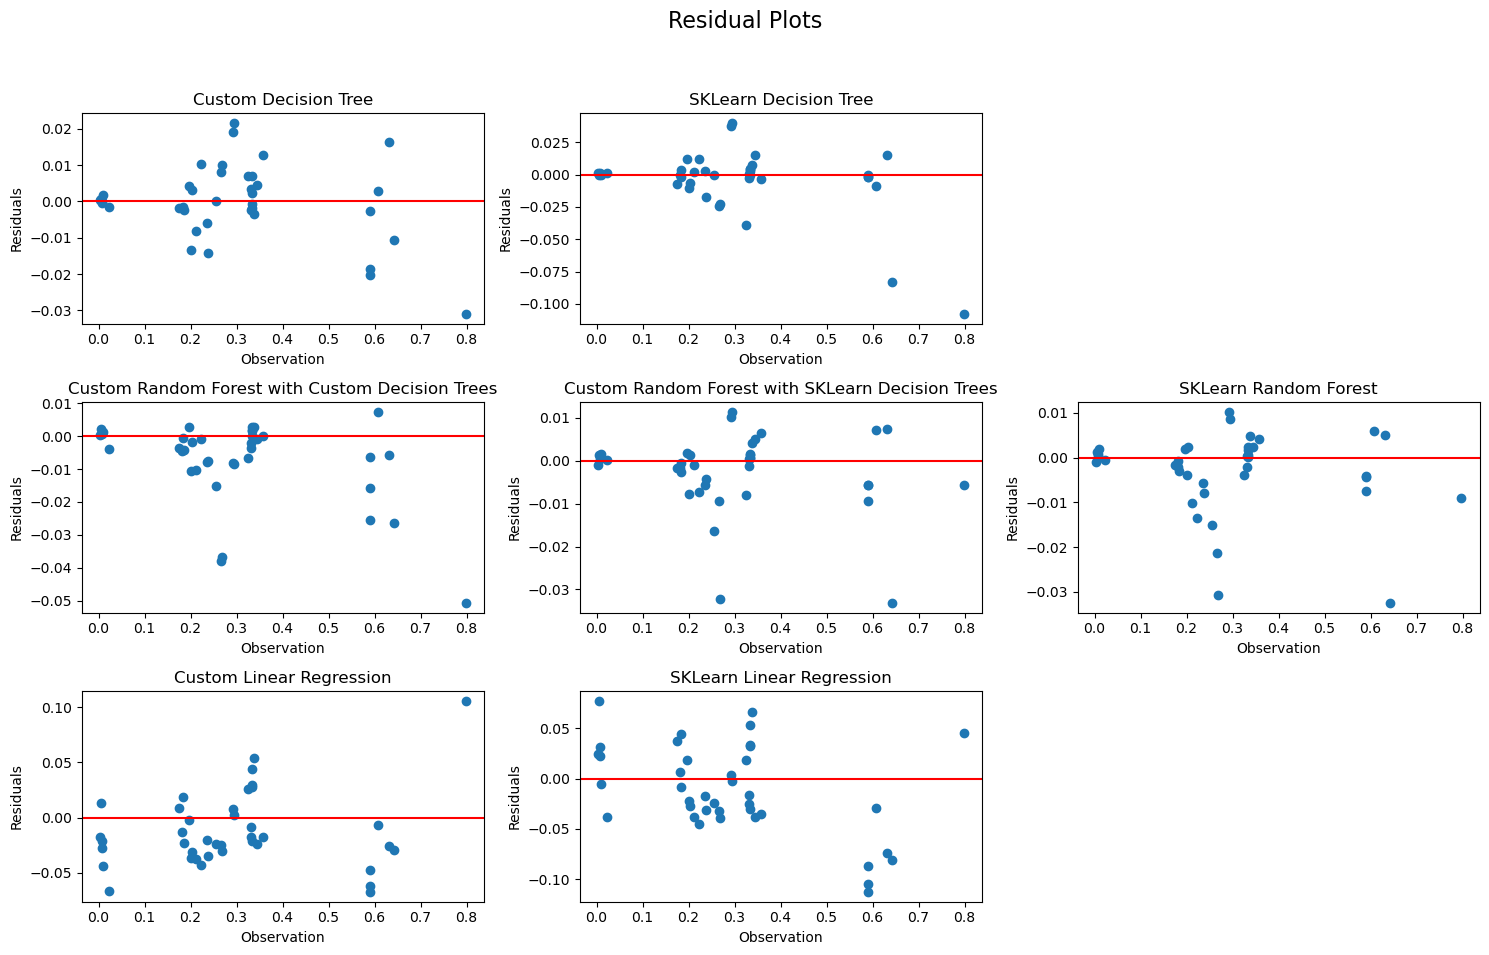

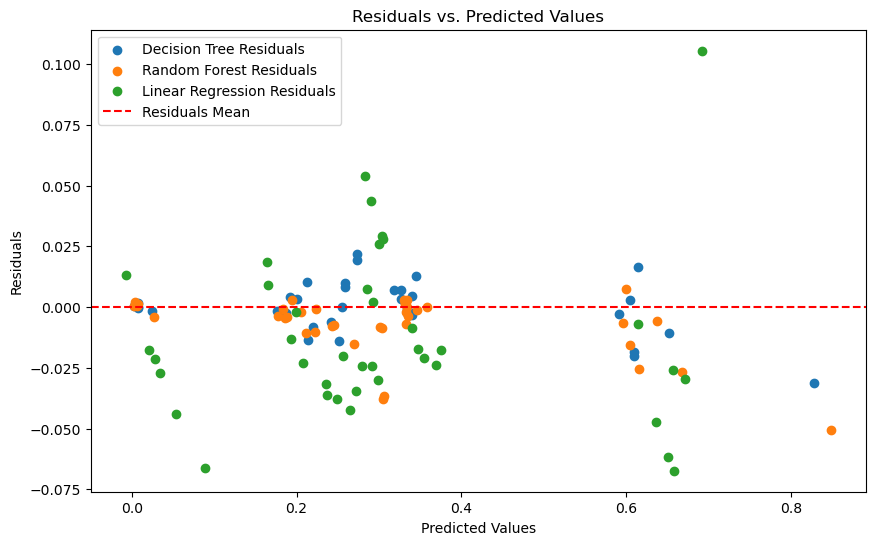

In [13]:
sklearn_decision_tree_regression_residulas = y_test - SKLearn_Decision_Tree_Regressor_Prediction
custom_decision_tree_residuals = y_test - Custom_Decision_Tree_Regressor_Prediction
sklearn_random_forest_residuals = y_test - SKLearn_Random_Forest_Regressor_Prediction
sklearn_decision_trees_random_forest_residuals = y_test - SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction
custom_random_forest_residuals = y_test - Custom_Random_Forest_Regressor_Prediction
sklearn_Linear_regression_residuals = y_test - SKLearn_Linear_Regression_Prediction
custom_Linear_regression_residuals = y_test - Custom_Linear_Regression_Prediction

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.8, top=0.9)

axes[0,0].scatter(y_test, custom_decision_tree_residuals)
axes[0,0].axhline(y=0, color='r', linestyle='-')
axes[0,0].set_title('Custom Decision Tree')

axes[0,1].scatter(y_test, sklearn_decision_tree_regression_residulas)
axes[0,1].axhline(y=0, color='r', linestyle='-')
axes[0,1].set_title('SKLearn Decision Tree')

axes[1,0].scatter(y_test, custom_random_forest_residuals)
axes[1,0].axhline(y=0, color='r', linestyle='-')
axes[1,0].set_title('Custom Random Forest with Custom Decision Trees')

axes[1,1].scatter(y_test, sklearn_decision_trees_random_forest_residuals)
axes[1,1].axhline(y=0, color='r', linestyle='-')
axes[1,1].set_title('Custom Random Forest with SKLearn Decision Trees')

axes[1,2].scatter(y_test, sklearn_random_forest_residuals)
axes[1,2].axhline(y=0, color='r', linestyle='-')
axes[1,2].set_title('SKLearn Random Forest')

axes[2,0].scatter(y_test, custom_Linear_regression_residuals)
axes[2,0].axhline(y=0, color='r', linestyle='-')
axes[2,0].set_title('Custom Linear Regression')

axes[2,1].scatter(y_test, sklearn_Linear_regression_residuals)
axes[2,1].axhline(y=0, color='r', linestyle='-')
axes[2,1].set_title('SKLearn Linear Regression')

axes[0,2].set_axis_off()
axes[2,2].set_axis_off()

for ax in axes.flat:
    ax.set(xlabel='Observation', ylabel='Residuals')

plt.suptitle('Residual Plots', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Custom_Decision_Tree_Regressor_Prediction, y_test - Custom_Decision_Tree_Regressor_Prediction, label='Decision Tree Residuals')
plt.scatter(Custom_Random_Forest_Regressor_Prediction, y_test - Custom_Random_Forest_Regressor_Prediction, label='Random Forest Residuals')
plt.scatter(Custom_Linear_Regression_Prediction, y_test - Custom_Linear_Regression_Prediction, label='Linear Regression Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.legend()
plt.show()

# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R Squared, Cross-Validation, Explained Variance

In [14]:
table_data = {
    '': ['Custom Decision Tree Regressor', 'Custom Random Forest Regressor', 'Custom Linear Regression', 'SKLearn Decision Tree Regressor', 'Custom Random Forest Regressor using SKLearn Decision Trees', 'SKLearn Random Forest Regressor', 'SKLearn Linear Regression'],
    'Mean Absolute Error (MAE)': [Custom_Decision_Tree_Regressor_Prediction_MAE, Custom_Random_Forest_Regressor_MAE, Custom_Linear_Regression_MAE, SKLearn_Decision_Tree_Regressor_Prediction_MAE, SKLearn_Decision_Trees_Random_Forest_Regressor_MAE, SKLearn_Random_Forest_Regressor_Prediction_MAE,SKLearn_Linear_Regression_MAE],
    'Median Absolute Error (MedianAE)': [Custom_Decision_Tree_Regressor_MedianAE, Custom_Random_Forest_Regressor_MedianAE, Custom_Linear_Regression_MedianAE, SKLearn_Decision_Tree_Regressor_MedianAE, SKLearn_Decision_Trees_Random_Forest_Regressor_MedianAE, SKLearn_Random_Forest_Regressor_Prediction_MedianAE, SKLearn_Linear_Regression_MedianAE],
    'Mean Squared Error (MSE)': [Custom_Decision_Tree_Regressor_Prediction_MSE, Custom_Random_Forest_Regressor_MSE, Custom_Linear_Regression_MSE, SKLearn_Decision_Tree_Regressor_Prediction_MSE, SKLearn_Decision_Trees_Random_Forest_Regressor_MSE, SKLearn_Random_Forest_Regressor_Prediction_MSE, SKLearn_Linear_Regression_MSE],
    'Root Mean Squared Error (RMSE)': [Custom_Decision_Tree_Regressor_Prediction_RMSE, Custom_Random_Forest_Regressor_RMSE, Custom_Linear_Regression_RMSE, SKLearn_Decision_Tree_Regressor_Prediction_RMSE, SKLearn_Decision_Trees_Random_Forest_Regressor_RMSE, SKLearn_Random_Forest_Regressor_Prediction_RMSE, SKLearn_Linear_Regression_RMSE],
    'R Squared (R\u00b2)': [Custom_Decision_Tree_Regressor_Prediction_R2, Custom_Random_Forest_Regressor_R2, Custom_Linear_Regression_R2, SKLearn_Decision_Tree_Regressor_Prediction_R2, SKLearn_Decision_Trees_Random_Forest_Regressor_R2, SKLearn_Random_Forest_Regressor_Prediction_R2, SKLearn_Linear_Regression_R2],
    'Explained Variance': [Custom_Decision_Tree_Regressor_Explained_Variance, Custom_Random_Forest_Regressor_Explained_Variance, Custom_Linear_Regression_Explained_Variance, SKLearn_Decision_Tree_Regressor_Explained_Variance, SKLearn_Decision_Trees_Random_Forest_Regressor_Explained_Variance, SKLearn_Random_Forest_Regressor_Explained_Variance, SKLearn_Linear_Regression_Explained_Variance],
    'Mean Bias Deviation (MBD)': [Custom_Decision_Tree_Regressor_MBD, Custom_Random_Forest_Regressor_MBD, Custom_Linear_Regression_MBD, SKLearn_Decision_Tree_Regressor_MBD, SKLearn_Decision_Trees_Random_Forest_Regressor_MBD, SKLearn_Random_Forest_Regressor_MBD, SKLearn_Linear_Regression_MBD],
    'Maximum Error': [Custom_Decision_Tree_Regressor_MaxError, Custom_Random_Forest_Regressor_MaxError, Custom_Linear_Regression_MaxError, SKLearn_Decision_Tree_Regressor_MaxError, SKLearn_Decision_Trees_Random_Forest_Regressor_MaxError, SKLearn_Random_Forest_Regressor_MaxError, SKLearn_Linear_Regression_MaxError],
    'Huber Loss': [Custom_Decision_Tree_Regressor_HuberLoss, Custom_Random_Forest_Regressor_HuberLoss, Custom_Linear_Regression_HuberLoss, SKLearn_Decision_Tree_Regressor_HuberLoss, SKLearn_Decision_Trees_Random_Forest_Regressor_HuberLoss, SKLearn_Random_Forest_Regressor_HuberLoss, SKLearn_Linear_Regression_HuberLoss],
    'Quantile Loss': [Custom_Decision_Tree_Regressor_QuantileLoss, Custom_Random_Forest_Regressor_QuantileLoss, Custom_Linear_Regression_QuantileLoss, SKLearn_Decision_Tree_Regressor_QuantileLoss, SKLearn_Decision_Trees_Random_Forest_Regressor_QuantileLoss, SKLearn_Random_Forest_Regressor_QuantileLoss, SKLearn_Linear_Regression_QuantileLoss],
    'Mean Absolute Percentage Error (MAPE)': [Custom_Decision_Tree_Regressor_MAPE, Custom_Random_Forest_Regressor_MAPE, Custom_Linear_Regression_MAPE, SKLearn_Decision_Tree_Regressor_MAPE, SKLearn_Decision_Trees_Random_Forest_Regressor_MAPE, SKLearn_Random_Forest_Regressor_MAPE, SKLearn_Linear_Regression_MAPE],
    'Symmetric Mean Absolute Percentage Error (SMAPE)': [Custom_Decision_Tree_Regressor_SMAPE, Custom_Random_Forest_Regressor_SMAPE, Custom_Linear_Regression_SMAPE, SKLearn_Decision_Tree_Regressor_SMAPE, SKLearn_Decision_Trees_Random_Forest_Regressor_SMAPE, SKLearn_Random_Forest_Regressor_SMAPE, SKLearn_Linear_Regression_SMAPE]
}

print(tabulate(table_data, headers='keys', tablefmt='fancy_grid'))

╒═════════════════════════════════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════╤══════════════════════════════════╤══════════════════╤══════════════════════╤═════════════════════════════╤═════════════════╤══════════════╤═════════════════╤═════════════════════════════════════════╤════════════════════════════════════════════════════╕
│                                                             │   Mean Absolute Error (MAE) │   Median Absolute Error (MedianAE) │   Mean Squared Error (MSE) │   Root Mean Squared Error (RMSE) │   R Squared (R²) │   Explained Variance │   Mean Bias Deviation (MBD) │   Maximum Error │   Huber Loss │   Quantile Loss │   Mean Absolute Percentage Error (MAPE) │   Symmetric Mean Absolute Percentage Error (SMAPE) │
╞═════════════════════════════════════════════════════════════╪═════════════════════════════╪════════════════════════════════════╪════════════════════════════╪═══════════════

# Actual vs Predicted Values

╒═════════════════╤══════════════════════════════════╤══════════════════════════════════╤════════════════════════════╤═══════════════════════════════════╤═══════════════════════════════════════════════════════════════╤═══════════════════════════════════╤════════════════════════════╕
│   Actual Values │   Custom Decision Tree Regressor │   Custom Random Forest Regressor │   Custom Linear Regression │   SKLearn Decision Tree Regressor │   Custom Random Forest Regressor using SKLearn Decision Trees │   SKLearn Random Forest Regressor │   SKLearn Linear Regressor │
╞═════════════════╪══════════════════════════════════╪══════════════════════════════════╪════════════════════════════╪═══════════════════════════════════╪═══════════════════════════════════════════════════════════════╪═══════════════════════════════════╪════════════════════════════╡
│      0.254724   │                       0.254603   │                       0.26998    │                 0.278771   │                        0.2550

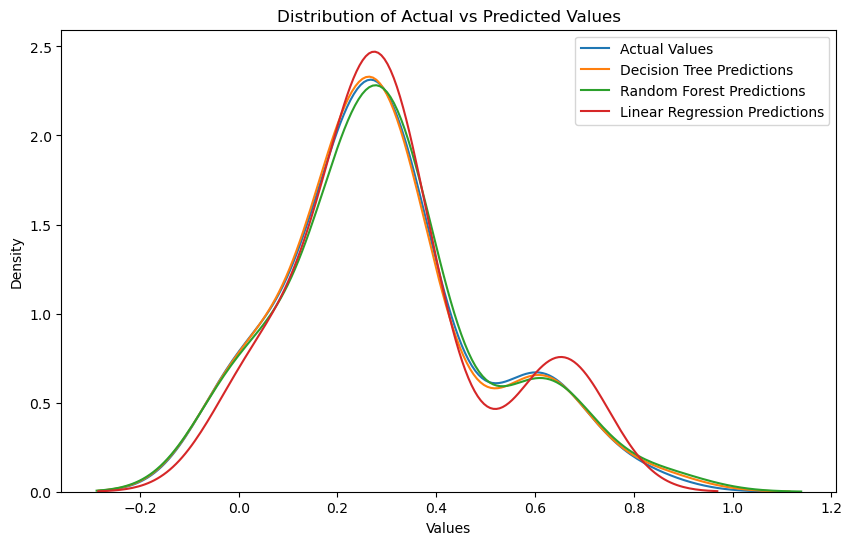

In [15]:
results_table_data = {
    'Actual Values': y_test,
    'Custom Decision Tree Regressor': Custom_Decision_Tree_Regressor_Prediction,
    'Custom Random Forest Regressor': Custom_Random_Forest_Regressor_Prediction,
    'Custom Linear Regression': Custom_Linear_Regression_Prediction,
    'SKLearn Decision Tree Regressor': SKLearn_Decision_Tree_Regressor_Prediction,
    'Custom Random Forest Regressor using SKLearn Decision Trees': SKLearn_Decision_Trees_Random_Forest_Regressor_Prediction,
    'SKLearn Random Forest Regressor': SKLearn_Random_Forest_Regressor_Prediction,
    'SKLearn Linear Regressor': SKLearn_Linear_Regression_Prediction
}

print(tabulate(results_table_data, headers='keys', tablefmt='fancy_grid'))

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values')
sns.kdeplot(Custom_Decision_Tree_Regressor_Prediction, label='Decision Tree Predictions')
sns.kdeplot(Custom_Random_Forest_Regressor_Prediction, label='Random Forest Predictions')
sns.kdeplot(Custom_Linear_Regression_Prediction, label='Linear Regression Predictions')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()